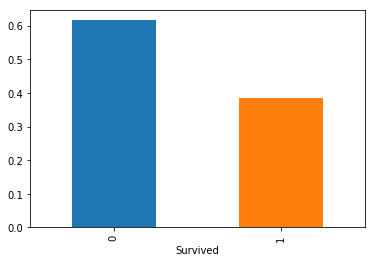

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
train_df = pd.read_csv('train.csv')
train_df.head()
test_df = pd.read_csv('test.csv')
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
total = len(train_df)
(train_df.groupby('Survived')['PassengerId'].count()/total).plot.bar()

In [2]:
## find the null value and fill it
print "percert of not null:",train_df['Pclass'].count()/total
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True)

percert of not null: 1


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [3]:
## PClass 无空值，且看上去Pclass==1时存活率较高。
## 再来看Sex
print "percert of not null:",train_df['Sex'].count()/total
pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True)

percert of not null: 1


Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


percert of not null: 0.801346801347


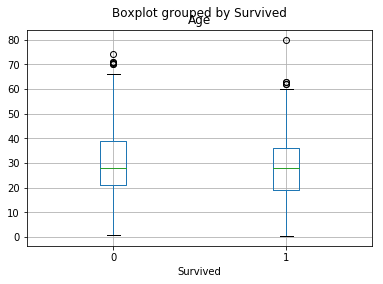

In [4]:
## 性别依旧没有空值，且female存活率明显非常高
## 开始看Age
print "percert of not null:",float(train_df['Age'].count())/total
train_df.boxplot(column='Age', by="Survived")

In [5]:
## 年龄空值较多，大约有20%，这个需要特殊处理。
train_df['NaN_Age'] = pd.isnull(train_df['Age'])
pd.crosstab(train_df['NaN_Age'], train_df['Survived'], margins=True)

Survived,0,1,All
NaN_Age,,,
False,424,290,714
True,125,52,177
All,549,342,891


percert of not null: 1.0


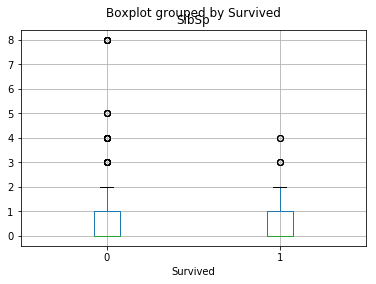

In [6]:
## 开始看SibSp
print "percert of not null:",float(train_df['SibSp'].count())/total
train_df.boxplot(column='SibSp', by="Survived")

In [7]:
# SibSp好像看不出啥，继续看Parch
print "percert of not null:",float(train_df['Parch'].count())/total
pd.crosstab(train_df['Parch'], train_df['Survived'], margins=True)

percert of not null: 1.0


Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


percert of not null: 1.0


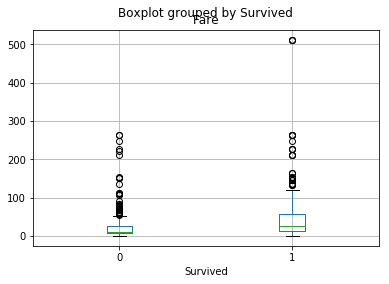

In [8]:
print "percert of not null:",float(train_df['Fare'].count())/total
train_df.boxplot(column='Fare', by="Survived")

In [9]:
## 我们可以发现，低票价伴随着高死亡率。
## 再看Embarked
print "percert of not null:",float(train_df['Embarked'].count())/total
pd.crosstab(train_df['Embarked'], train_df['Survived'], margins=True)

percert of not null: 0.997755331089


Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [10]:
## 由于Embarked空值非常少，所以使用众数来填充
train_df['Embarked']=train_df['Embarked'].fillna('S')    

In [11]:
print "percert of not null:",float(train_df['Cabin'].count())/total

percert of not null: 0.228956228956


In [12]:
## Cabin大部分都是缺失的，所以我们暂时可以放弃该特征

# 自此，所有特征数据处理都已经结束，现在开始对这些特征做归一化处理
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x[0] if type(x) == str else '')
pd.crosstab(train_df['Deck'], train_df['Survived'], margins=True)


Survived,0,1,All
Deck,,,
,481,206,687
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1


In [13]:
features.append('Deck')
print features

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck']


In [14]:
## 上面我们注意到了Age字段为空的大约有20%，不能简单用均值去填充。可以使用PClass、Sex、Name去预测
train_df=train_df.drop(0)
test_df=test_df.drop(0)
combined_train = train_df.append(test_df)
## 先提取Name中的称呼,做归一化处理
combined_train['Title'] = combined_train['Name'].str.extract('.+,(.+)').str.extract( '^(.+?)\.').str.strip()
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master'], 'Master'))
combined_train['Title'] = combined_train['Title'].map(title_Dict)
pd.crosstab(combined_train['Title'], combined_train['Age'], margins=True)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,...,65.0,66.0,67.0,70.0,70.5,71.0,74.0,76.0,80.0,All
Title,,,,,,,,,,,,,,,,,,,,,
Master,0,1,1,1,1,3,1,5,5,4,...,0,0,0,0,0,0,0,0,0,53
Miss,1,0,0,0,2,0,1,5,7,3,...,0,0,0,0,0,0,0,0,0,212
Mr,0,0,0,0,0,0,0,0,0,0,...,3,1,1,1,1,2,1,0,1,579
Mrs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,172
Officer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,22
Royalty,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
All,1,1,1,1,3,3,2,10,12,7,...,3,1,1,2,1,2,1,1,1,1044


In [15]:
title_dummies_df = pd.get_dummies(combined_train['Title'], prefix=combined_train[['Title']].columns[0])
combined_train = pd.concat([combined_train, title_dummies_df], axis=1)
#填充Embarked缺失值
combined_train['Embarked']=combined_train['Embarked'].fillna('S')
#print combined_train['Embarked']
combined_train['Embarked'] = combined_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

combined_train['Fare'] = combined_train[['Fare']].fillna(combined_train.groupby('Pclass').transform('mean'))
combined_train.loc[ combined_train['Fare'] <= 7.91, 'Fare']= 0
combined_train.loc[(combined_train['Fare'] > 7.91) & (combined_train['Fare'] <= 14.454), 'Fare'] = 1
combined_train.loc[(combined_train['Fare'] > 14.454) & (combined_train['Fare'] <= 31), 'Fare']   = 2
combined_train.loc[ combined_train['Fare'] > 31, 'Fare']                                  = 3
combined_train['Fare'] = combined_train['Fare'].astype(int)
combined_train['Sex'] = combined_train['Sex'].map({'female': 0, 'male': 1}).astype(int)
combined_train['Title'] = combined_train['Title'].map({'Mrs': 0, 'Miss': 1,'Mr':2,'Master':3,'Royalty':4,"Officer":5}).astype(int)
missing_age_df = pd.DataFrame(combined_train[['Age', 'Parch', 'Sex', 'SibSp', 'Title', 'Fare', 'Pclass', 'Embarked']])
##将数据中年龄没有缺失的作为训练数据，缺失的作为测试数据
missing_age_train = missing_age_df[pd.notnull(missing_age_df['Age'])]
missing_age_test = missing_age_df[pd.isnull(missing_age_df['Age'])]
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)
    print missing_age_X_train
    print missing_age_Y_train
    #模型1 http://blog.csdn.net/SA14023053/article/details/51817650
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [3],'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1,  scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print 'Age feature Best GB Params:', str(gbm_reg_grid.best_params_)
    print 'Age feature Best GB Score:' , str(gbm_reg_grid.best_score_)
    print 'GB Train Error for "Age" Feature Regressor:', str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train))
    missing_age_test['Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print missing_age_test['Age_GB'][:4]
    #模型2
    lrf_reg = LinearRegression()
    lrf_reg_param_grid = {'fit_intercept': [True], 'normalize': [True]}
    lrf_reg_grid = GridSearchCV(lrf_reg, lrf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    lrf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print 'Age feature Best LR Params:' , str(lrf_reg_grid.best_params_)
    print 'Age feature Best LR Score:' , str(lrf_reg_grid.best_score_)
    print 'LR Train Error for "Age" Feature Regressor' , str(lrf_reg_grid.score(missing_age_X_train, missing_age_Y_train))
    missing_age_test['Age_LRF'] = lrf_reg_grid.predict(missing_age_X_test)
    print missing_age_test['Age_LRF'][:4]
    #将两个模型预测后的均值作为最终预测结果
    print 'shape1',missing_age_test['Age'].shape,missing_age_test[['Age_GB','Age_LRF']].mode(axis=1).shape
    missing_age_test['Age'] = np.mean([missing_age_test['Age_GB'],missing_age_test['Age_LRF']])
    print(missing_age_test['Age'][:4])
    missing_age_test=missing_age_test.drop(['Age_GB', 'Age_LRF'])
    return missing_age_test

combined_train.loc[pd.isnull(combined_train['Age']), 'Age'] = fill_missing_age(missing_age_train,missing_age_test)





     Parch  Sex  SibSp  Title  Fare  Pclass  Embarked
1        0    0      1      0     3       1         1
2        0    0      0      1     1       3         0
3        0    0      1      0     3       1         0
4        0    1      0      2     1       3         0
6        0    1      0      2     3       1         0
7        1    1      3      3     2       3         0
8        2    0      0      0     1       3         0
9        0    0      1      0     2       2         1
10       1    0      1      1     2       3         0
11       0    0      0      1     2       1         0
12       0    1      0      2     1       3         0
13       5    1      1      2     3       3         0
14       0    0      0      1     0       3         0
15       0    0      0      0     2       2         0
16       1    1      4      3     2       3         2
18       0    0      1      0     2       3         0
20       0    1      0      2     2       2         0
21       0    1      0      

[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.2s finished


Age feature Best GB Params: {'max_features': 3, 'n_estimators': 2000, 'learning_rate': 0.01, 'max_depth': 3}
Age feature Best GB Score: -112.25348186
GB Train Error for "Age" Feature Regressor: -97.1007516895
5     33.620773
17    32.111172
19    33.229164
26    26.345861
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/usr/local

Age feature Best LR Params: {'normalize': True, 'fit_intercept': True}
Age feature Best LR Score: -157.514849686
LR Train Error for "Age" Feature Regressor -154.163468101
5     27.826060
17    35.270519
19    27.300569
26    28.471085
Name: Age_LRF, dtype: float64
shape1 (263,) (263, 2)
5     28.373908
17    28.373908
19    28.373908
26    28.373908
Name: Age, dtype: float64


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
